In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Load CSV
df = pd.read_csv('Fertilizer Prediction.csv')
df.head(10)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
5,26,52,35,Sandy,Barley,12,10,13,17-17-17
6,25,50,64,Red,Cotton,9,0,10,20-20
7,33,64,50,Loamy,Wheat,41,0,0,Urea
8,30,60,42,Sandy,Millets,21,0,18,28-28
9,29,58,33,Black,Oil seeds,9,7,30,14-35-14


In [50]:
df.shape

(99, 9)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [52]:
df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [53]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: bool

In [54]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


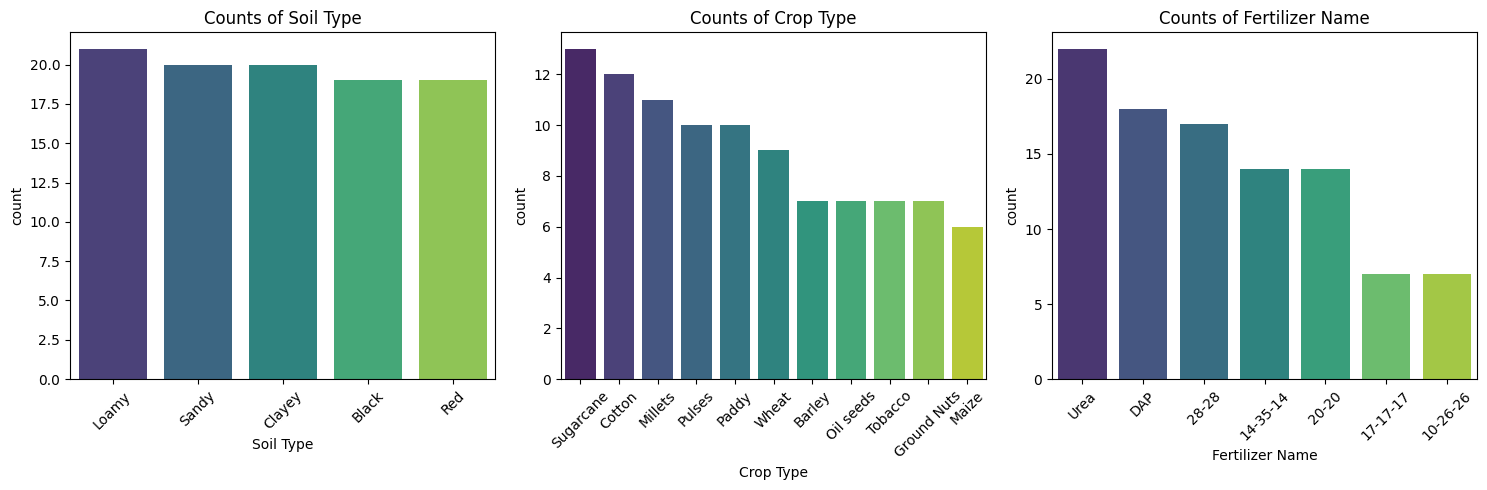

In [55]:
# Categorical Features
categorical_columns = ['Soil Type', 'Crop Type', 'Fertilizer Name']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

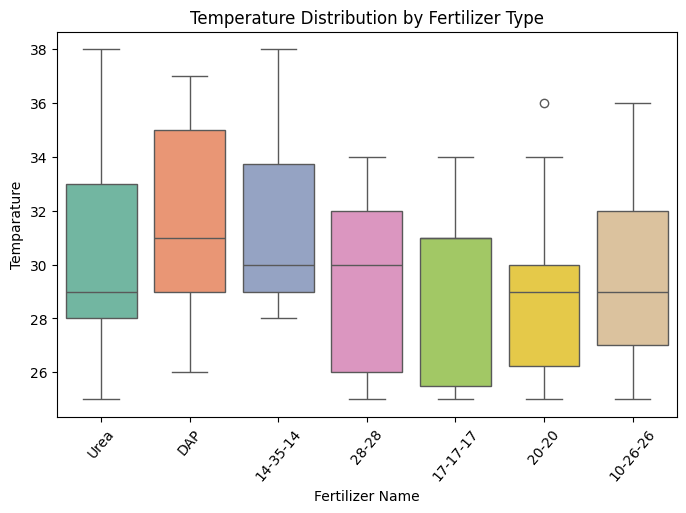

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Fertilizer Name', y='Temparature', palette='Set2')
plt.title("Temperature Distribution by Fertilizer Type")
plt.xticks(rotation=50)
plt.show()

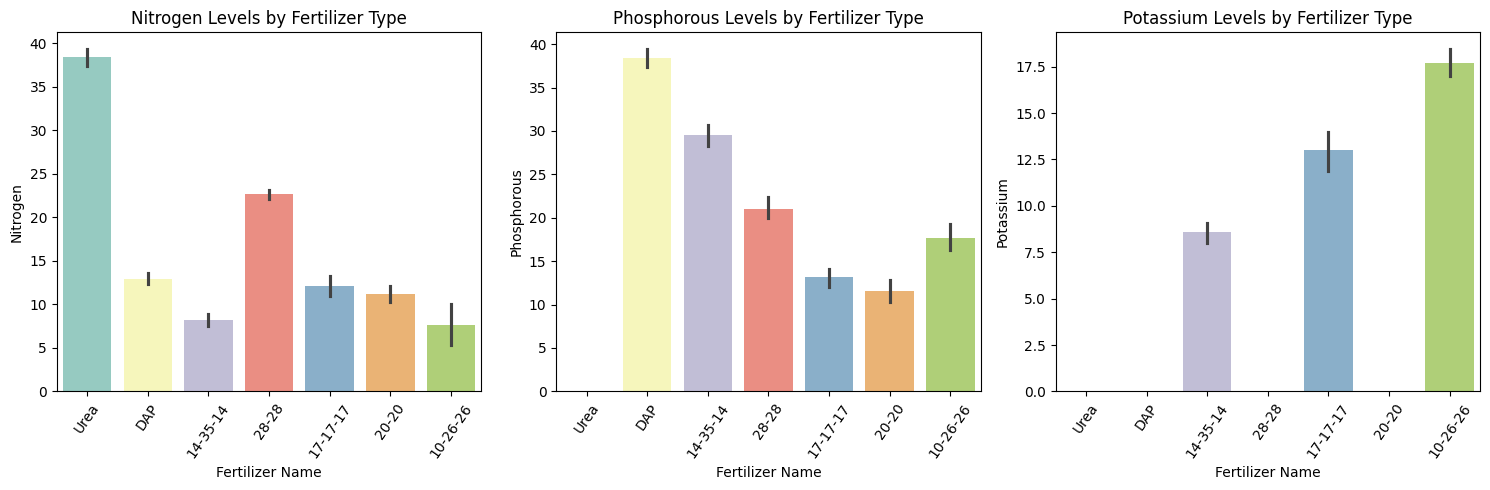

In [57]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Nitrogen', 'Phosphorous', 'Potassium']):
    plt.subplot(1, 3, i + 1)
    sns.barplot(data=df, x='Fertilizer Name', y=col, palette='Set3')
    plt.title(f"{col} Levels by Fertilizer Type")
    plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

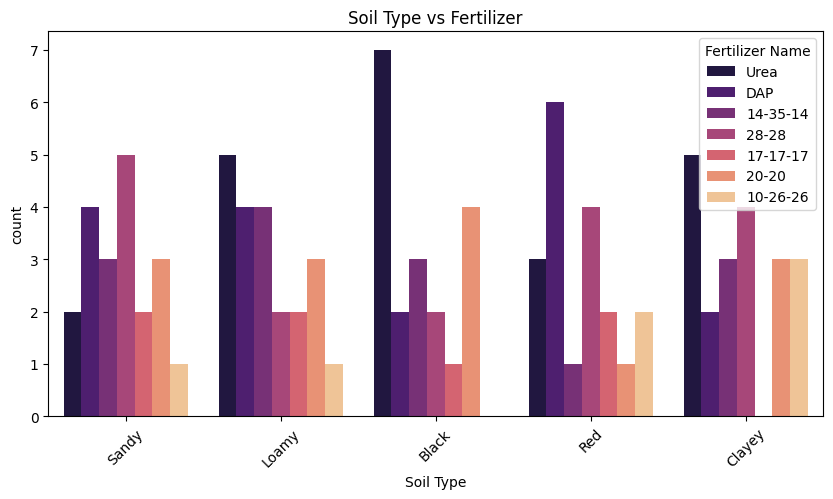

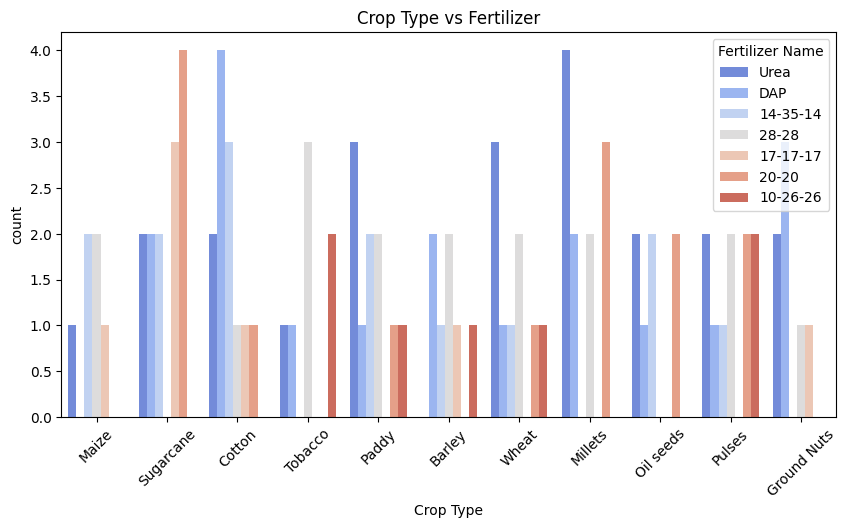

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Soil Type', hue='Fertilizer Name', palette='magma')
plt.title("Soil Type vs Fertilizer")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Crop Type', hue='Fertilizer Name', palette='coolwarm')
plt.title("Crop Type vs Fertilizer")
plt.xticks(rotation=45)
plt.show()

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object


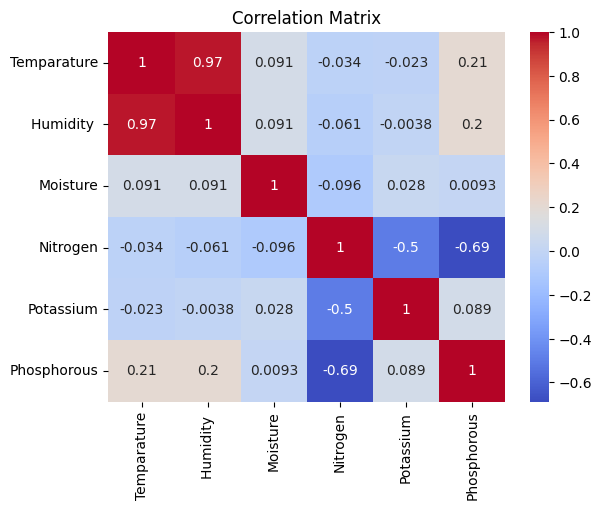

In [59]:
print(df.dtypes)
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [60]:
# Keep only needed columns
df = df[['Crop Type', 'Nitrogen', 'Phosphorous', 'Potassium', 'Fertilizer Name']]


In [61]:
# Encode Crop Type
crop_encoder = LabelEncoder()
df['Crop'] = crop_encoder.fit_transform(df['Crop Type'])

In [62]:
# Encode Fertilizer Name
fertilizer_encoder = LabelEncoder()
df['Fertilizer'] = fertilizer_encoder.fit_transform(df['Fertilizer Name'])


In [63]:
# Features and target
X = df[['Crop', 'Nitrogen', 'Phosphorous', 'Potassium']]
y = df['Fertilizer']


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
# Predict on test data
y_pred = model.predict(X_test)

In [68]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 100.00%


In [69]:
from sklearn.metrics import accuracy_score

# Replace `y_test` and `y_pred` with your actual variable names
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 100.00%


In [37]:
# Save everything
pickle.dump(model, open('fert_model_simple.pkl', 'wb'))
pickle.dump(crop_encoder, open('crop_encoder.pkl', 'wb'))
pickle.dump(fertilizer_encoder, open('fertilizer_encoder.pkl', 'wb'))

print("✅ Fertilizer model trained and saved!")

✅ Fertilizer model trained and saved!
